<a href="https://colab.research.google.com/github/MiracleUche123/CatBoost-Team-Project/blob/main/%23feature%2C%20modeling%20and%20pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Remittance Merged 1970 - 2022.csv to Remittance Merged 1970 - 2022.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Remittance Merged 1970 - 2022.csv']))

In [4]:
df.head()

,country_name,country_code,Year,remittance_received,remittance_paid,gdp,unemployment_rate,Region,IncomeGroup
0,Aruba,ABW,1970,0.0,0.0,0.0,0.0,Latin America & Caribbean,High income
1,Aruba,ABW,1971,0.0,0.0,0.0,0.0,Latin America & Caribbean,High income
2,Aruba,ABW,1972,0.0,0.0,0.0,0.0,Latin America & Caribbean,High income
3,Aruba,ABW,1973,0.0,0.0,0.0,0.0,Latin America & Caribbean,High income
4,Aruba,ABW,1974,0.0,0.0,0.0,0.0,Latin America & Caribbean,High income


In [5]:
df.shape

(11501, 9)

In [6]:
corr = df.corr()

<ipython-input-6-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


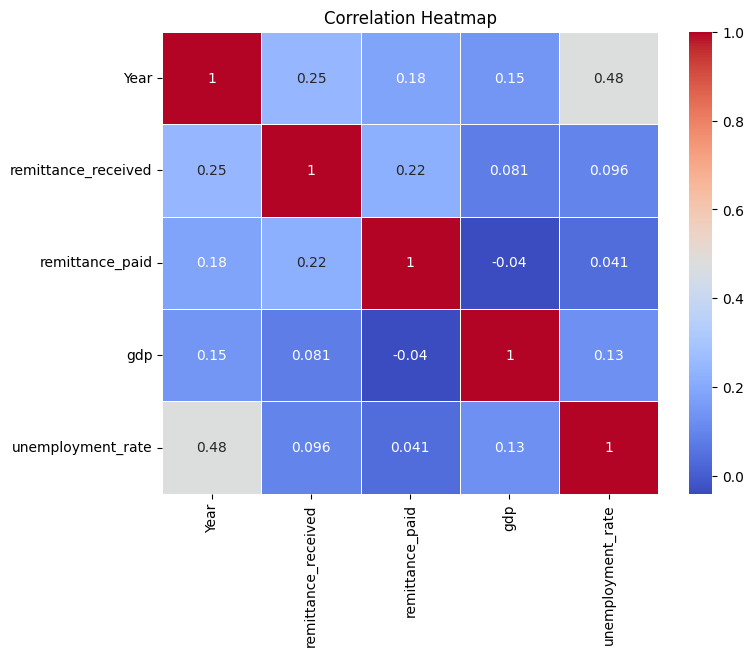

In [7]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
df.columns

Index(['country_name', 'country_code', 'Year', 'remittance_received',
       'remittance_paid', 'gdp', 'unemployment_rate', 'Region', 'IncomeGroup'],
      dtype='object')

In [9]:
# Calculate the percentage change in GDP
df['GDP_Pct_Change'] = df['gdp'].pct_change()

In [10]:
# Calculate the percentage change in remittance_received
df['Remittance_Pct_Change'] = df['remittance_received'].pct_change()

In [11]:
#df['Remittance_Per_Capita'] = df['remittance_received'] / df['population']

In [12]:
# Calculate the difference in unemployment rate as the unemployment rate change
df['Unemployment_Rate_Change'] = df['unemployment_rate'].diff()


In [13]:
# Calculate remittance volatility using a rolling standard deviation
#windowsize=months
window_size = 12
df['Remittance_Volatility'] = df['remittance_received'].rolling(window=window_size).std()


In [14]:
uploaded = files.upload()

Saving new_features.csv to new_features.csv


In [15]:
new_df = pd.read_csv(io.BytesIO(uploaded['new_features.csv']))

In [16]:
new_df.head()

,Year,country_code,country_name,gdp,income_group,region,population,remittance_growth_rate,remittance_paid,remittance_per_capita,remittance_received,remittance_to_gdp_ratio,remittance_volatility,unemployment_rate,unemployment_rate_change
0,1970,AFG,Afghanistan,0.0,Low income,South Asia,10752971.0,0.0,0.0,0.0,0.0,0.0,2.934855e+08,0.0,0.0
1,1971,AFG,Afghanistan,0.0,Low income,South Asia,11015857.0,0.0,0.0,0.0,0.0,0.0,2.934855e+08,0.0,0.0
2,1972,AFG,Afghanistan,0.0,Low income,South Asia,11286753.0,0.0,0.0,0.0,0.0,0.0,2.934855e+08,0.0,0.0
3,1973,AFG,Afghanistan,0.0,Low income,South Asia,11575305.0,0.0,0.0,0.0,0.0,0.0,2.934855e+08,0.0,0.0
4,1974,AFG,Afghanistan,0.0,Low income,South Asia,11869879.0,0.0,0.0,0.0,0.0,0.0,2.934855e+08,0.0,0.0


In [17]:
new_df.columns

Index(['Year', 'country_code', 'country_name', 'gdp', 'income_group', 'region',
       'population', 'remittance_growth_rate', 'remittance_paid',
       'remittance_per_capita', 'remittance_received',
       'remittance_to_gdp_ratio', 'remittance_volatility', 'unemployment_rate',
       'unemployment_rate_change'],
      dtype='object')

In [18]:
#
new_df['Remittance_Per_Capita'] = new_df['remittance_received'] / new_df['population']

In [19]:
new_df

,Year,country_code,country_name,gdp,income_group,region,population,remittance_growth_rate,remittance_paid,remittance_per_capita,remittance_received,remittance_to_gdp_ratio,remittance_volatility,unemployment_rate,unemployment_rate_change,Remittance_Per_Capita
0,1970,AFG,Afghanistan,0.000000,Low income,South Asia,10752971.0,0.000000,0.00,0.000000,0.000000e+00,0.000000e+00,2.934855e+08,0.000,0.000,0.000000
1,1971,AFG,Afghanistan,0.000000,Low income,South Asia,11015857.0,0.000000,0.00,0.000000,0.000000e+00,0.000000e+00,2.934855e+08,0.000,0.000,0.000000
2,1972,AFG,Afghanistan,0.000000,Low income,South Asia,11286753.0,0.000000,0.00,0.000000,0.000000e+00,0.000000e+00,2.934855e+08,0.000,0.000,0.000000
3,1973,AFG,Afghanistan,0.000000,Low income,South Asia,11575305.0,0.000000,0.00,0.000000,0.000000e+00,0.000000e+00,2.934855e+08,0.000,0.000,0.000000
4,1974,AFG,Afghanistan,0.000000,Low income,South Asia,11869879.0,0.000000,0.00,0.000000,0.000000e+00,0.000000e+00,2.934855e+08,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11496,2018,ZWE,Zimbabwe,4.179939,Lower middle income,Sub-Saharan Africa,15052184.0,-17.468271,29278892.45,94.850224,1.427703e+09,3.415607e+08,8.881924e+08,6.784,0.505,94.850224
11497,2019,ZWE,Zimbabwe,6.490458,Lower middle income,Sub-Saharan Africa,15354608.0,-0.748830,13480565.66,92.285779,1.417012e+09,2.183223e+08,8.881924e+08,7.370,0.586,92.285779
11498,2020,ZWE,Zimbabwe,8.517271,Lower middle income,Sub-Saharan Africa,15669666.0,29.288915,21707094.03,116.916301,1.832039e+09,2.150970e+08,8.881924e+08,7.898,0.528,116.916301
11499,2021,ZWE,Zimbabwe,6.985948,Lower middle income,Sub-Saharan Africa,15993524.0,8.185447,0.00,123.925159,1.982000e+09,2.837124e+08,8.881924e+08,8.067,0.169,123.925159


In [20]:
new_df.isna().sum()

Year                         0
country_code                 0
country_name                 0
gdp                          0
income_group                 0
region                       0
population                   0
remittance_growth_rate       0
remittance_paid              0
remittance_per_capita        0
remittance_received          0
remittance_to_gdp_ratio      0
remittance_volatility        0
unemployment_rate            0
unemployment_rate_change     0
Remittance_Per_Capita       20
dtype: int64

In [21]:
new_corr = new_df.corr()

<ipython-input-21-d8f0c652ec67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_corr = new_df.corr()


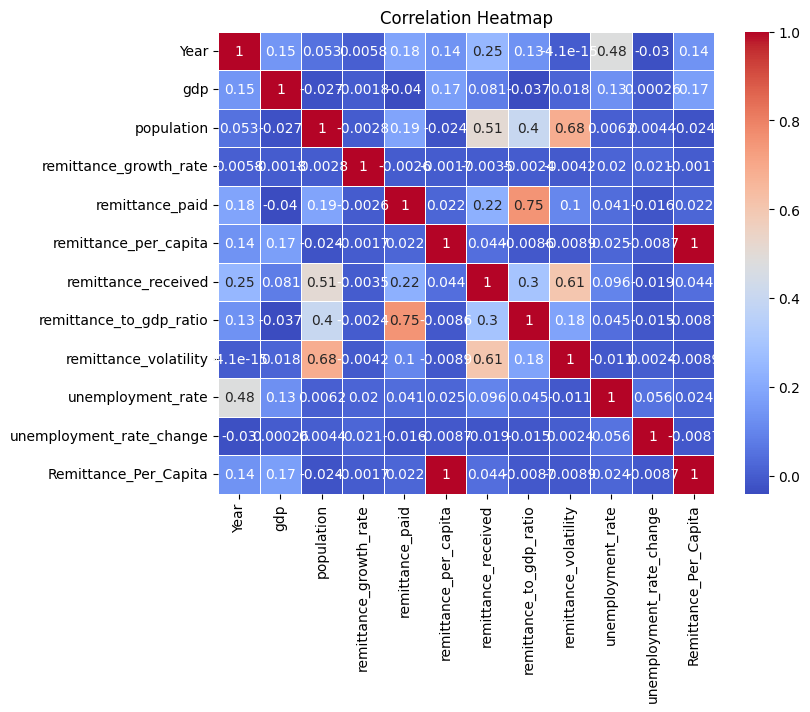

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(new_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11501 entries, 0 to 11500
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      11501 non-null  int64  
 1   country_code              11501 non-null  object 
 2   country_name              11501 non-null  object 
 3   gdp                       11501 non-null  float64
 4   income_group              11501 non-null  object 
 5   region                    11501 non-null  object 
 6   population                11501 non-null  float64
 7   remittance_growth_rate    11501 non-null  float64
 8   remittance_paid           11501 non-null  float64
 9   remittance_per_capita     11501 non-null  float64
 10  remittance_received       11501 non-null  float64
 11  remittance_to_gdp_ratio   11501 non-null  float64
 12  remittance_volatility     11501 non-null  float64
 13  unemployment_rate         11501 non-null  float64
 14  unempl

In [24]:
new_df.describe()

,Year,gdp,population,remittance_growth_rate,remittance_paid,remittance_per_capita,remittance_received,remittance_to_gdp_ratio,remittance_volatility,unemployment_rate,unemployment_rate_change,Remittance_Per_Capita
count,11501.000000,11501.000000,1.150100e+04,1.150100e+04,1.150100e+04,11501.000000,1.150100e+04,1.150100e+04,1.150100e+04,11501.000000,11501.000000,11481.000000
mean,1996.000000,2.492252,2.665519e+07,inf,7.504801e+08,121.649705,1.005537e+09,1.638247e+09,1.175654e+09,4.237415,0.000041,121.861620
std,15.297724,8.381531,1.102681e+08,NaN,3.640931e+09,859.089788,4.012485e+09,9.873824e+09,3.009694e+09,5.962153,0.781012,859.822780
min,1970.000000,0.000000,0.000000e+00,-1.000000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-7.300000,0.000000
25%,1983.000000,0.000000,5.338640e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.243050e+07,0.000000,-0.008000,0.000000
50%,1996.000000,0.124126,4.575818e+06,0.000000e+00,4.378217e+06,3.349335,1.228892e+07,1.127685e+07,2.259152e+08,1.107000,0.000000,3.410373
75%,2009.000000,1.920497,1.530581e+07,8.835117e+00,1.107406e+08,68.252051,4.445650e+08,2.582551e+08,9.743004e+08,6.830000,0.000000,68.324671
max,2022.000000,235.927991,1.417173e+09,inf,7.915300e+10,25964.621558,1.112220e+11,2.546270e+11,3.185556e+10,38.800000,19.708000,25964.621558


In [25]:
new_df['GDP_Pct_Change'] = new_df['gdp'].pct_change()
new_df['Remittance_Pct_Change'] = new_df['remittance_received'].pct_change()

In [26]:
# Calculate the remittance to GDP ratio
new_df['Remittance_to_GDP_Ratio'] = new_df['remittance_received'] / new_df['gdp']

In [27]:
# Calculate remittance volatility using a rolling standard deviation
window_size = 12  # You can adjust this window size as needed
new_df['Remittance_Volatility'] = new_df['remittance_received'].rolling(window=window_size).std()

In [28]:
# Calculate the percentage change in remittance_received as the remittance growth rate
new_df['Remittance_Growth_Rate'] = new_df['remittance_received'].pct_change() * 100


In [29]:

"""
Remittance Destination Diversity:
Since y there are no destination country columns, we won't be able to calculate diversity
 based on destination countries. Lets explore other features that might capture similar information.
 For example,  calculating the average or total remittance amount received by each country, which could indirectly
 reflect the concentration or diversity of remittance sources.

Remittance Source Diversity:
Similarly, calculating diversity based on sources is not feasible.
 However,let us create features that capture the distribution of remittances over time.
 For instance, lets calculate the co-efficient of variation (standard deviation divided by mean) of
 remittance_received values for each country over a certain window of time. This could provide an idea of
  how much the remittance amounts vary relative to their mean.

  """

"\nRemittance Destination Diversity:\nSince y there are no destination country columns, we won't be able to calculate diversity\n based on destination countries. Lets explore other features that might capture similar information.\n For example,  calculating the average or total remittance amount received by each country, which could indirectly\n reflect the concentration or diversity of remittance sources.\n\nRemittance Source Diversity:\nSimilarly, calculating diversity based on sources is not feasible.\n However,let us create features that capture the distribution of remittances over time.\n For instance, lets calculate the co-efficient of variation (standard deviation divided by mean) of\n remittance_received values for each country over a certain window of time. This could provide an idea of\n  how much the remittance amounts vary relative to their mean.\n\n  "

In [30]:
# Calculate coefficient of variation for remittance_received
new_df['Remittance_Coefficient_Variation'] = new_df['remittance_received'].rolling(window=window_size).std() / new_df['remittance_received'].rolling(window=window_size).mean()


In [31]:
new_df.head()

,Year,country_code,country_name,gdp,income_group,region,population,remittance_growth_rate,remittance_paid,remittance_per_capita,...,remittance_volatility,unemployment_rate,unemployment_rate_change,Remittance_Per_Capita,GDP_Pct_Change,Remittance_Pct_Change,Remittance_to_GDP_Ratio,Remittance_Volatility,Remittance_Growth_Rate,Remittance_Coefficient_Variation
0,1970,AFG,Afghanistan,0.0,Low income,South Asia,10752971.0,0.0,0.0,0.0,...,2.934855e+08,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1971,AFG,Afghanistan,0.0,Low income,South Asia,11015857.0,0.0,0.0,0.0,...,2.934855e+08,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1972,AFG,Afghanistan,0.0,Low income,South Asia,11286753.0,0.0,0.0,0.0,...,2.934855e+08,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1973,AFG,Afghanistan,0.0,Low income,South Asia,11575305.0,0.0,0.0,0.0,...,2.934855e+08,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1974,AFG,Afghanistan,0.0,Low income,South Asia,11869879.0,0.0,0.0,0.0,...,2.934855e+08,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
new_df.isna().sum()

Year                                   0
country_code                           0
country_name                           0
gdp                                    0
income_group                           0
region                                 0
population                             0
remittance_growth_rate                 0
remittance_paid                        0
remittance_per_capita                  0
remittance_received                    0
remittance_to_gdp_ratio                0
remittance_volatility                  0
unemployment_rate                      0
unemployment_rate_change               0
Remittance_Per_Capita                 20
GDP_Pct_Change                      4646
Remittance_Pct_Change               4532
Remittance_to_GDP_Ratio             4744
Remittance_Volatility                 11
Remittance_Growth_Rate              4532
Remittance_Coefficient_Variation    2890
dtype: int64

In [33]:
#### handling missing data

In [34]:
data = new_df.copy()

In [35]:
data.shape

(11501, 22)

In [36]:
# Data Cleaning and Exploration
data = data.interpolate(method='linear')
  # filled based on neighboring data points

In [37]:
data.isna().sum()

Year                                 0
country_code                         0
country_name                         0
gdp                                  0
income_group                         0
region                               0
population                           0
remittance_growth_rate               0
remittance_paid                      0
remittance_per_capita                0
remittance_received                  0
remittance_to_gdp_ratio              0
remittance_volatility                0
unemployment_rate                    0
unemployment_rate_change             0
Remittance_Per_Capita                0
GDP_Pct_Change                      38
Remittance_Pct_Change               38
Remittance_to_GDP_Ratio             38
Remittance_Volatility               11
Remittance_Growth_Rate              38
Remittance_Coefficient_Variation    38
dtype: int64

In [38]:
data = data.dropna()  # Remove rows with missing values

In [39]:
data.columns

Index(['Year', 'country_code', 'country_name', 'gdp', 'income_group', 'region',
       'population', 'remittance_growth_rate', 'remittance_paid',
       'remittance_per_capita', 'remittance_received',
       'remittance_to_gdp_ratio', 'remittance_volatility', 'unemployment_rate',
       'unemployment_rate_change', 'Remittance_Per_Capita', 'GDP_Pct_Change',
       'Remittance_Pct_Change', 'Remittance_to_GDP_Ratio',
       'Remittance_Volatility', 'Remittance_Growth_Rate',
       'Remittance_Coefficient_Variation'],
      dtype='object')

In [40]:
pred_df = data[['Year', 'country_code', 'gdp',
       'remittance_per_capita', 'remittance_received',
       'remittance_to_gdp_ratio', 'remittance_volatility', 'unemployment_rate',
       'unemployment_rate_change', 'Remittance_Per_Capita', 'GDP_Pct_Change',
       'Remittance_Pct_Change', 'Remittance_to_GDP_Ratio',
       'Remittance_Volatility', 'Remittance_Growth_Rate',
       'Remittance_Coefficient_Variation']]

In [41]:
pred_df.corr()

<ipython-input-41-75f8cfe326a2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pred_df.corr()


,Year,gdp,remittance_per_capita,remittance_received,remittance_to_gdp_ratio,remittance_volatility,unemployment_rate,unemployment_rate_change,Remittance_Per_Capita,GDP_Pct_Change,Remittance_Pct_Change,Remittance_to_GDP_Ratio,Remittance_Volatility,Remittance_Growth_Rate,Remittance_Coefficient_Variation
Year,1.000000,0.145770,0.138000,0.245130,0.133486,-0.000477,0.475599,-0.029645,0.138000,-0.000159,-0.000149,0.063656,-0.092557,-0.000149,-0.254456
gdp,0.145770,1.000000,0.167619,0.080594,-0.037394,0.017873,0.126566,0.000261,0.167619,-0.005121,-0.005431,-0.056522,0.008693,-0.005431,-0.189278
remittance_per_capita,0.138000,0.167619,1.000000,0.043819,-0.008702,-0.009036,0.024522,-0.008742,1.000000,-0.002910,-0.003306,-0.018240,-0.001194,-0.003306,-0.097229
remittance_received,0.245130,0.080594,0.043819,1.000000,0.295878,0.605286,0.095995,-0.019055,0.043819,-0.005669,-0.006506,0.253451,0.378078,-0.006506,-0.213889
remittance_to_gdp_ratio,0.133486,-0.037394,-0.008702,0.295878,1.000000,0.182884,0.044523,-0.014755,-0.008702,-0.003749,-0.004359,0.905581,0.105709,-0.004359,-0.142086
remittance_volatility,-0.000477,0.017873,-0.009036,0.605286,0.182884,1.000000,-0.011076,0.002369,-0.009036,-0.006549,-0.007046,0.155315,0.280225,-0.007046,-0.169650
unemployment_rate,0.475599,0.126566,0.024522,0.095995,0.044523,-0.011076,1.000000,0.056108,0.024522,0.020375,0.019540,0.000064,-0.053700,0.019540,-0.228058
unemployment_rate_change,-0.029645,0.000261,-0.008742,-0.019055,-0.014755,0.002369,0.056108,1.000000,-0.008742,0.024553,0.025186,-0.013014,-0.005908,0.025186,0.042523
Remittance_Per_Capita,0.138000,0.167619,1.000000,0.043819,-0.008702,-0.009036,0.024522,-0.008742,1.000000,-0.002910,-0.003306,-0.018240,-0.001194,-0.003306,-0.097229
GDP_Pct_Change,-0.000159,-0.005121,-0.002910,-0.005669,-0.003749,-0.006549,0.020375,0.024553,-0.002910,1.000000,0.997393,-0.003897,-0.006587,0.997393,0.073946


In [42]:
pred_df['Year'].dtype

dtype('int64')

In [43]:
pred_df['Year'] = pd.to_datetime(pred_df['Year'], format='%Y')

<ipython-input-43-d1c121e4a1b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['Year'] = pd.to_datetime(pred_df['Year'], format='%Y')


In [44]:
pred_df.set_index('Year', inplace=True)

In [45]:
pred_df.groupby('Year').mean()

<ipython-input-45-467aab0ea42c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pred_df.groupby('Year').mean()


,gdp,remittance_per_capita,remittance_received,remittance_to_gdp_ratio,remittance_volatility,unemployment_rate,unemployment_rate_change,Remittance_Per_Capita,GDP_Pct_Change,Remittance_Pct_Change,Remittance_to_GDP_Ratio,Remittance_Volatility,Remittance_Growth_Rate,Remittance_Coefficient_Variation
Year,,,,,,,,,,,,,,
1970-01-01,0.041250,0.538825,8.931859e+06,1.308927e+07,1.179738e+09,0.000000,0.000000,0.538825,NaN,NaN,NaN,1.038774e+09,NaN,0.922998
1971-01-01,0.094028,1.025485,1.144104e+07,2.612310e+07,1.179738e+09,0.000000,0.000000,1.025485,NaN,NaN,NaN,1.275153e+09,NaN,1.025477
1972-01-01,0.109593,1.387164,1.392151e+07,3.138404e+07,1.179738e+09,0.000000,0.000000,1.387164,NaN,NaN,NaN,1.442238e+09,NaN,1.130333
1973-01-01,0.106243,1.672803,1.494520e+07,4.028510e+07,1.179738e+09,0.000000,0.000000,1.672803,NaN,NaN,NaN,1.555092e+09,NaN,1.236953
1974-01-01,0.170633,2.076757,2.106681e+07,4.886772e+07,1.179738e+09,0.000000,0.000000,2.076757,NaN,NaN,NaN,1.630249e+09,NaN,1.363843
1975-01-01,0.844870,4.642824,4.723552e+07,9.653882e+07,1.179738e+09,0.000000,0.000000,4.642824,NaN,NaN,NaN,1.672532e+09,NaN,1.485683
1976-01-01,1.064561,6.468360,5.431435e+07,1.074078e+08,1.179738e+09,0.000000,0.000000,6.468360,NaN,NaN,NaN,1.679392e+09,NaN,1.628702
1977-01-01,1.148615,9.143704,8.149702e+07,2.563303e+08,1.179738e+09,0.000000,0.000000,9.143704,NaN,NaN,NaN,1.633896e+09,NaN,1.789988
1978-01-01,1.123679,11.168071,1.080695e+08,3.111309e+08,1.179738e+09,0.000000,0.000000,11.168071,NaN,NaN,NaN,1.531864e+09,NaN,1.991976


In [96]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [47]:
pred_df.columns

Index(['country_code', 'gdp', 'remittance_per_capita', 'remittance_received',
       'remittance_to_gdp_ratio', 'remittance_volatility', 'unemployment_rate',
       'unemployment_rate_change', 'Remittance_Per_Capita', 'GDP_Pct_Change',
       'Remittance_Pct_Change', 'Remittance_to_GDP_Ratio',
       'Remittance_Volatility', 'Remittance_Growth_Rate',
       'Remittance_Coefficient_Variation'],
      dtype='object')

In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.interpolate import griddata
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [70]:
#  Feature selection
features = ['remittance_received','remittance_to_gdp_ratio', 'remittance_volatility','unemployment_rate_change','Remittance_Per_Capita', 'Remittance_Volatility', 'Remittance_Coefficient_Variation']
target = 'gdp'
X = pred_df[features]
y = pred_df[target]

In [71]:
#  Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model = LinearRegression()

In [60]:
pred_df.isna().sum()

country_code                        0
gdp                                 0
remittance_per_capita               0
remittance_received                 0
remittance_to_gdp_ratio             0
remittance_volatility               0
unemployment_rate                   0
unemployment_rate_change            0
Remittance_Per_Capita               0
GDP_Pct_Change                      0
Remittance_Pct_Change               0
Remittance_to_GDP_Ratio             0
Remittance_Volatility               0
Remittance_Growth_Rate              0
Remittance_Coefficient_Variation    0
dtype: int64

In [61]:
print(X_train.isnull().sum())

remittance_received                 0
remittance_to_gdp_ratio             0
remittance_volatility               0
unemployment_rate_change            0
Remittance_Per_Capita               0
Remittance_to_GDP_Ratio             0
Remittance_Volatility               0
Remittance_Growth_Rate              0
Remittance_Coefficient_Variation    0
dtype: int64


In [62]:
print(np.isinf(X_train).sum())

remittance_received                    0
remittance_to_gdp_ratio                0
remittance_volatility                  0
unemployment_rate_change               0
Remittance_Per_Capita                  0
Remittance_to_GDP_Ratio              592
Remittance_Volatility                  0
Remittance_Growth_Rate              3754
Remittance_Coefficient_Variation       0
dtype: int64


In [92]:
# Assuming your DataFrame is named 'data'
new_data = pred_df.sample(n=1, random_state=42)
new_data = new_data[features]

# Print the placeholder values
print("Placeholder values:")
print(new_data.values)

Placeholder values:
[[0.00000000e+00 0.00000000e+00 9.87935283e+08 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.46410164e+00]]


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)

Mean Squared Error: 112.22018611531327


In [80]:
mse = mean_squared_error(y_test, y_pred)

In [81]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 112.22018611531327


In [82]:
# Train and evaluate Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

In [83]:
print(f"Random Forest Regression MSE: {rf_mse}")

Random Forest Regression MSE: 5.876727808129246


In [85]:
# Calculate additional evaluation metrics
linear_mae = mean_absolute_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print the additional evaluation metrics
print(f"Linear Regression MAE: {linear_mae}")
print(f"Linear Regression R^2: {linear_r2}")
print(f"Random Forest Regression MAE: {rf_mae}")
print(f"Random Forest Regression R^2: {rf_r2}")


Linear Regression MAE: 3.0541456941447054
Linear Regression R^2: 0.04558722653231917
Random Forest Regression MAE: 0.39630645198341036
Random Forest Regression R^2: 0.950019472606222


In [86]:
# Get the feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a dataframe of feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)


                            Feature  Importance
4             Remittance_Per_Capita    0.318118
1           remittance_to_gdp_ratio    0.257758
2             remittance_volatility    0.205016
0               remittance_received    0.122325
5             Remittance_Volatility    0.070669
6  Remittance_Coefficient_Variation    0.022486
3          unemployment_rate_change    0.003629


In [88]:
import joblib
from sklearn.model_selection import cross_val_score

In [87]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print("Average MSE:", cv_scores.mean())

Cross-Validation Scores:
[  4.33626403   2.07034081 184.6039221    3.40489693   5.15597809]
Average MSE: 39.91428039237337


In [90]:
# Save the trained model to disk
joblib.dump(rf_model, 'random_forest_model.pkl')

# Load the model from disk
loaded_model = joblib.load('random_forest_model.pkl')

In [93]:
# Use the loaded model to make predictions
new_data = pd.DataFrame([[25.5, 0.6, 10.2]], columns=features)

In [94]:
predictions = loaded_model.predict(new_data)

In [95]:
print("Predictions:", predictions)

Predictions: [0.]


In [78]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)

In [97]:
# Train-Test Split
train_size = int(0.8 * len(pred_df))
train, test = pred_df[:train_size], pred_df[train_size:]

In [98]:
# Model Training and Evaluation (ARIMA)
model = ARIMA(train['gdp'], order=(5, 1, 0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [99]:
model_fit = model.fit()

In [100]:
predictions, conf_int = model_fit.forecast(steps=len(test), alpha=0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


ValueError: ignored

In [68]:
# Visualize Predictions
plt.plot(test.index, test['gdp'], label='Actual GDP')
plt.plot(test.index, predictions, color='red', label='Predicted GDP')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Actual vs. Predicted GDP')
plt.show()

NotImplementedError: ignored

Still working on this!!!